Concepts like Ensemble model hasn't been used nor did we use boosted models like Adaboost or XGBoost. We have tried to demonstarte what we have learned from this course i.e. - Pre-processing, validation technique etc.

#Mounting Drive

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


# Importing Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTEENN
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from IPython.display import display,HTML
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN, BorderlineSMOTE, RandomOverSampler
from sklearn.model_selection import cross_val_score, StratifiedKFold


# Creating a dataframe Using the Dataset

In [4]:
df=pd.read_csv('/content/drive/MyDrive/CSE-477/Churn_Modelling.csv')

In [5]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Exploratory Data Analysis (EDA)

Class Yes: 7963
Class No: 2037
Proportion: 3.91 : 1




<ipython-input-18-6fb736e21259>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Exited',palette='deep')


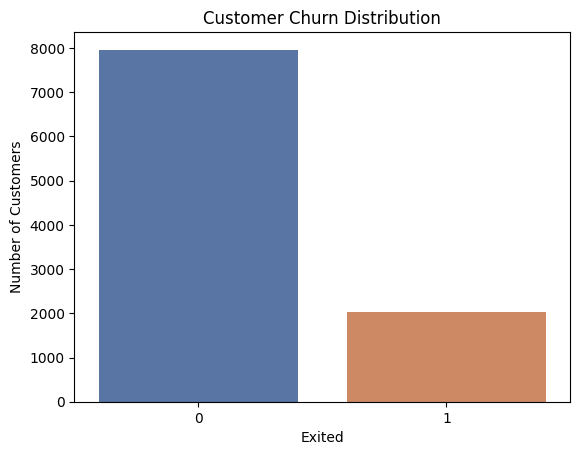

In [ ]:
target_count =df['Exited'].value_counts()
print('Class Yes:', target_count[0])
print('Class No:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1\n\n')


sns.countplot(data=df, x='Exited',palette='deep')

plt.xlabel('Exited')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Distribution')

plt.show()


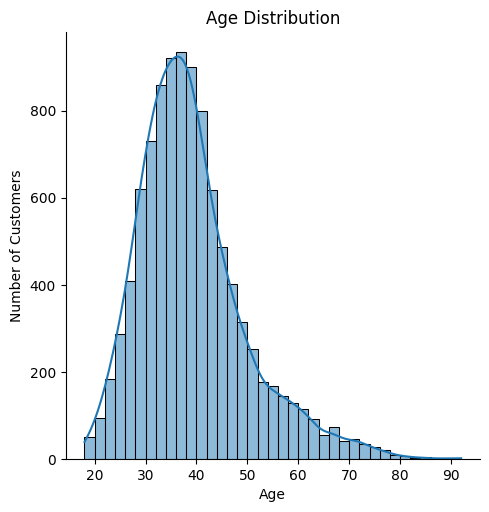

In [ ]:
sns.displot(data=df, x='Age', kde=True, bins=37)

plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Age Distribution')

plt.show()


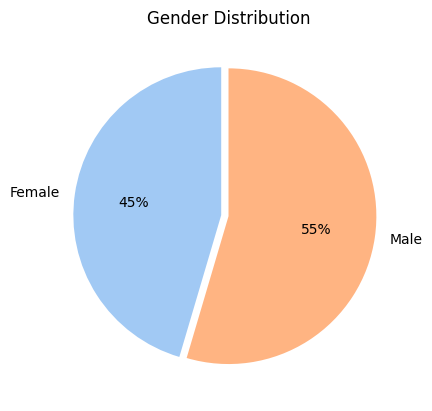

In [ ]:
data = [df[df["Gender"]=="Female"].shape[0],df[df["Gender"]=="Male"].shape[0]]
labels = ['Female', 'Male']

colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, explode = (0.05,0), startangle=90, autopct='%.0f%%')
plt.title("Gender Distribution")
plt.show()

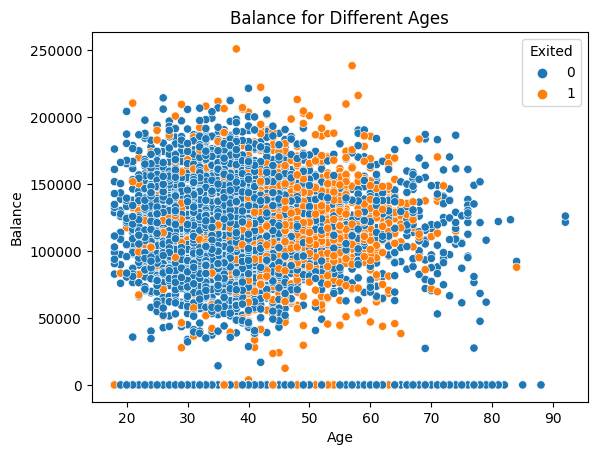

In [ ]:
sns.scatterplot(data=df,x="Age",y="Balance",hue="Exited")
plt.title("Balance for Different Ages")
plt.show()

Text(0.5, 1.0, 'Histogram of Estimated Salary')

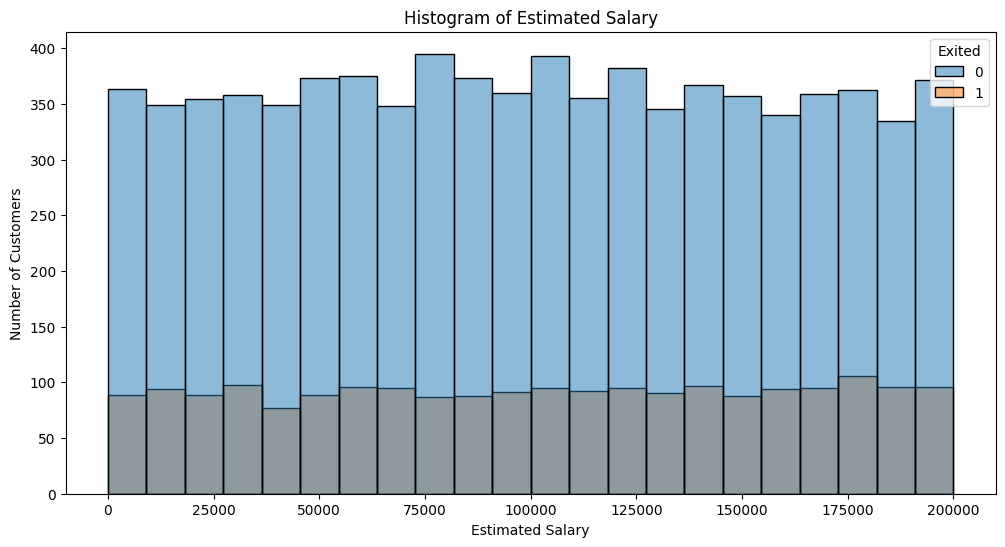

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='EstimatedSalary',hue='Exited')
plt.xlabel('Estimated Salary')
plt.ylabel('Number of Customers')
plt.title('Histogram of Estimated Salary')

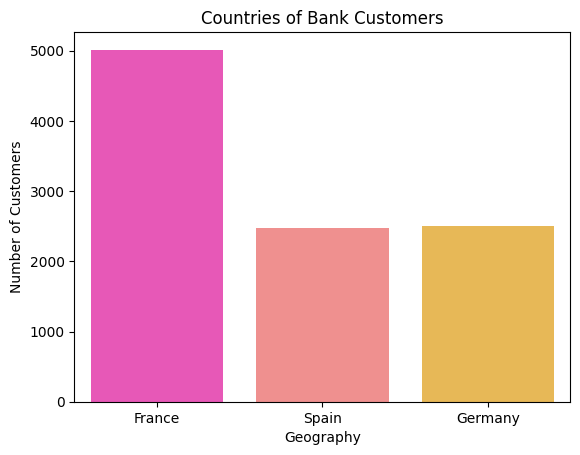

In [ ]:
sns.countplot(data=df,x="Geography",palette='spring')
plt.ylabel('Number of Customers')
plt.title("Countries of Bank Customers")
plt.show()

<ipython-input-58-67f32a23aaca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


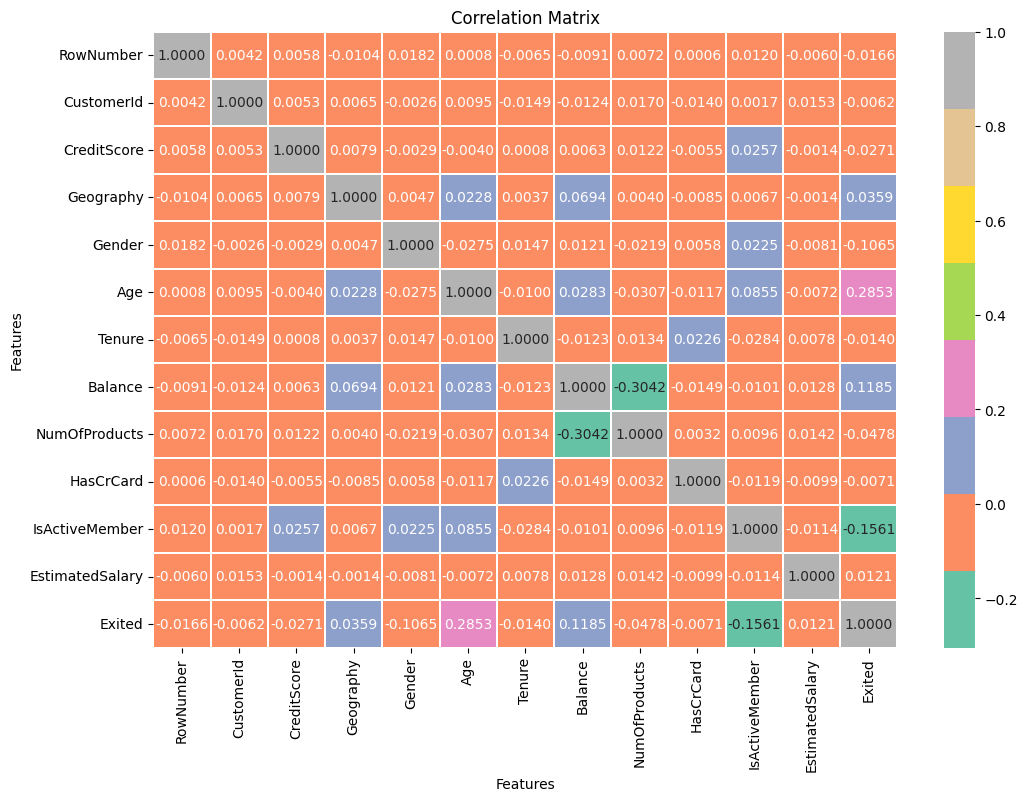

In [ ]:
correlations = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlations, linecolor='white',linewidths=0.1, annot=True,fmt='.4f',cmap='Set2')
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.show()

#Pre-Processing

**Label Encoding**

In [6]:
encoder = LabelEncoder()
df['Geography']=encoder.fit_transform(df['Geography'])
df['Gender']=encoder.fit_transform(df['Gender'])
df
# Female=0 & Male=1
# France=0 ,Spain=2 and Germany=1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


**Normalization**

In [7]:
scaler = MinMaxScaler()

columns_to_normalize = ["CreditScore", "Balance", "EstimatedSalary"]

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Features used for Training Models

In [8]:
X = df.drop(['Exited','RowNumber','CustomerId','Surname'],axis=1)
Y = df['Exited']

In [ ]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

# Splitting the dataset for training and testing

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=100)

# Decision Tree

In [ ]:
model_DT=DecisionTreeClassifier()
model_DT.fit(X_train,Y_train)

DecisionTreeClassifier()

# Random Forest

In [ ]:
model_RF = RandomForestClassifier(n_estimators=500, random_state=42)
model_RF.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

# Accuracy, Precision, Recall & F1-Score  Calculation

In [ ]:
y_pred_RF = model_RF.predict(X_test)
y_pred_DT = model_DT.predict(X_test)

accuracy_values =[
    accuracy_score (Y_test, y_pred_RF),
    accuracy_score (Y_test, y_pred_DT)
]
precision_values = [
    precision_score(Y_test, y_pred_RF),
    precision_score(Y_test, y_pred_DT)
]

recall_values = [
    recall_score(Y_test, y_pred_RF),
    recall_score(Y_test, y_pred_DT)
]

f1_values = [
    f1_score(Y_test, y_pred_RF),
    f1_score(Y_test, y_pred_DT)
]

# Accuracy, Precision, Recall & F1-Score Comparison

In [ ]:
model_names = [ "Random Forest", "Decision Tree"]

for model_name, accuracy, precision, recall, f1 in zip(model_names, accuracy_values, precision_values, recall_values, f1_values):
    print('Metrics for {}:'.format(model_name))
    print('  Accuracy: {:.2f}%'.format(accuracy * 100))
    print('  Precision: {:.2f}'.format(precision))
    print('  Recall: {:.2f}'.format(recall))
    print('  F1 Score: {:.2f}'.format(f1))
    print('------')

best_model_acc = model_names[accuracy_values.index(max(accuracy_values))]
best_model_pre = model_names[precision_values.index(max(precision_values))]
best_model_rec = model_names[recall_values.index(max(recall_values))]
best_model_f1 = model_names[f1_values.index(max(f1_values))]
best_accuracy = max(accuracy_values)
best_precision = max(precision_values)
best_recall = max(recall_values)
best_f1 = max(f1_values)
print('Best model based on accuracy: {} with accuracy {:.2f}%\n'.format(best_model_acc, best_accuracy * 100))
print('Best model based on precision: {} with precision {:.2f}%\n'.format(best_model_pre, best_precision * 100))
print('Best model based on recall: {} with recall {:.2f}%\n'.format(best_model_rec, best_recall * 100))
print('Best model based on f1-score: {} with f1-score {:.2f}%'.format(best_model_f1, best_f1 * 100))


Metrics for Random Forest:
  Accuracy: 86.00%
  Precision: 0.80
  Recall: 0.43
  F1 Score: 0.56
------
Metrics for Decision Tree:
  Accuracy: 78.92%
  Precision: 0.49
  Recall: 0.48
  F1 Score: 0.48
------
Best model based on accuracy: Random Forest with accuracy 86.00%

Best model based on precision: Random Forest with precision 79.57%

Best model based on recall: Decision Tree with recall 47.96%

Best model based on f1-score: Random Forest with f1-score 55.92%


Since Dataset is an imbalanced Dataset we will apply oversampling technique. So, the models have a hard time predicting the minority class.The low rcall and precision is proof of that. We will use SMOTE-ENN to solve this.

# Applying SMOTE-ENN

In [9]:
smote_enn = SMOTEENN(sampling_strategy='auto')
X_smenn, y_smenn = smote_enn.fit_resample(X, Y)


# K-fold validation for number of folds= 3,5,8 and 10

In [ ]:
num_folds = [3, 5, 8, 10]


decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators=500, random_state=42)

for fold in num_folds:
    print(f"\nNumber of Folds: {fold}\n")

    kf = StratifiedKFold(n_splits=fold, shuffle=True, random_state=100)

    dt_accuracy = cross_val_score(decision_tree, X_smenn, y_smenn, cv=kf, scoring='accuracy')
    dt_precision = cross_val_score(decision_tree, X_smenn, y_smenn, cv=kf, scoring='precision')
    dt_recall = cross_val_score(decision_tree, X_smenn, y_smenn, cv=kf, scoring='recall')
    dt_f1 = cross_val_score(decision_tree, X_smenn, y_smenn, cv=kf, scoring='f1')

    rf_accuracy = cross_val_score(random_forest, X_smenn, y_smenn, cv=kf, scoring='accuracy')
    rf_precision = cross_val_score(random_forest, X_smenn, y_smenn, cv=kf, scoring='precision')
    rf_recall = cross_val_score(random_forest, X_smenn, y_smenn, cv=kf, scoring='recall')
    rf_f1 = cross_val_score(random_forest, X_smenn, y_smenn, cv=kf, scoring='f1')


    print("Decision Tree Metrics:")
    print(f"Accuracy: {dt_accuracy.mean():.2f}")
    print(f"Precision: {dt_precision.mean():.2f}")
    print(f"Recall: {dt_recall.mean():.2f}")
    print(f"F1-score: {dt_f1.mean():.2f}")

    print("\nRandom Forest Metrics:")
    print(f"Accuracy: {rf_accuracy.mean():.2f}")
    print(f"Precision: {rf_precision.mean():.2f}")
    print(f"Recall: {rf_recall.mean():.2f}")
    print(f"F1-score: {rf_f1.mean():.2f}")



Number of Folds: 3

Decision Tree Metrics:
Accuracy: 0.81
Precision: 0.82
Recall: 0.85
F1-score: 0.84

Random Forest Metrics:
Accuracy: 0.87
Precision: 0.87
Recall: 0.90
F1-score: 0.89

Number of Folds: 5

Decision Tree Metrics:
Accuracy: 0.81
Precision: 0.82
Recall: 0.85
F1-score: 0.84

Random Forest Metrics:
Accuracy: 0.87
Precision: 0.87
Recall: 0.90
F1-score: 0.89

Number of Folds: 8

Decision Tree Metrics:
Accuracy: 0.82
Precision: 0.83
Recall: 0.85
F1-score: 0.84

Random Forest Metrics:
Accuracy: 0.88
Precision: 0.88
Recall: 0.91
F1-score: 0.89

Number of Folds: 10

Decision Tree Metrics:
Accuracy: 0.82
Precision: 0.83
Recall: 0.86
F1-score: 0.84

Random Forest Metrics:
Accuracy: 0.88
Precision: 0.88
Recall: 0.91
F1-score: 0.89


As we can see in the result above that for all validations Random Forest provides the best result . So we are going to train the random forest model and use that for prediction.

# Splitting dataset into train and test again to train the Random forest model

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X_smenn, y_smenn, test_size=0.25, random_state=100)

In [11]:
Model_RF = RandomForestClassifier(n_estimators=500, random_state=42)
Model_RF.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

# Save Model

In [12]:
joblib.dump(Model_RF,'/content/drive/MyDrive/CSE-477/Model_RF.pkl')

['/content/drive/MyDrive/CSE-477/Model_RF.pkl']

# Load Model

In [14]:
model_RF= joblib.load('/content/drive/MyDrive/CSE-477/Model_RF.pkl')

In [31]:
y_predict_RF = Model_RF.predict(x_test)

accuracy = accuracy_score(y_test, y_predict_RF) * 100
precision = precision_score(y_test, y_predict_RF) * 100
recall = recall_score(y_test, y_predict_RF) * 100
f1 = f1_score(y_test, y_predict_RF) * 100

print("Accuracy: {:.2f}%".format(accuracy))
print("Precision: {:.2f}%".format(precision))
print("Recall: {:.2f}%".format(recall))
print("F1-score: {:.2f}%".format(f1))


Accuracy: 93.90%
Precision: 94.37%
Recall: 95.11%
F1-score: 94.74%


Confusion Matrix

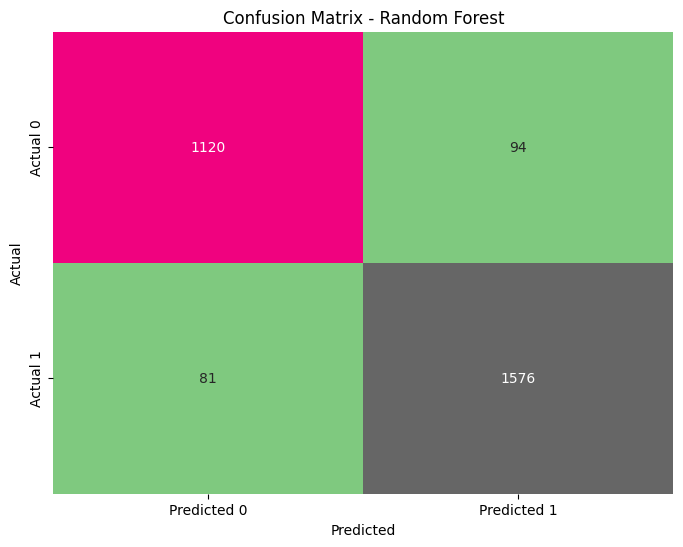

In [32]:
conf_matrix_RF = confusion_matrix(y_test, y_predict_RF)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_RF, annot=True, fmt='d', cmap='Accent', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


ROC Curve

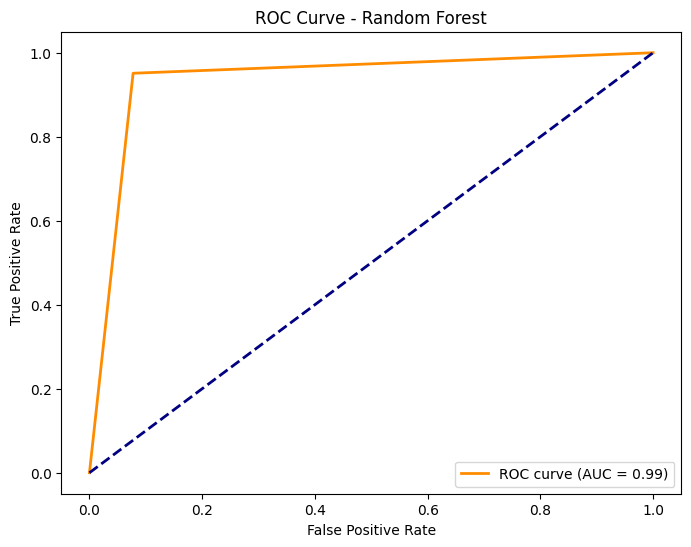

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict_RF)
auc = roc_auc_score(y_test, y_predict_RF)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()




# Predict Function

In [ ]:
def predict_churn(CreditScore,  age, Tenure, Balance,Salary):

    normalized_values = scaler.transform([[CreditScore, Balance, Salary]])
    CreditScore,Balance,Salary = normalized_values[0]

    selected_values = get_selected_values(radio_buttons)
    gender = selected_values['Gender']
    geography = selected_values['Geography']
    credit= selected_values['Credit Card']
    active = selected_values['Member']
    products = selected_values['Products']




    input_data = pd.DataFrame(columns=X.columns)
    input_data.loc[0] = 0

    input_data.loc[0, 'CreditScore'] = CreditScore
    input_data.loc[0, 'Geography'] = geography
    input_data.loc[0, 'Gender'] = gender
    input_data.loc[0, 'Age'] = age
    input_data.loc[0, 'Tenure'] = Tenure
    input_data.loc[0, 'Balance'] = Balance
    input_data.loc[0, 'NumOfProducts'] = products
    input_data.loc[0, 'HasCrCard'] = credit
    input_data.loc[0, 'IsActiveMember'] = active
    input_data.loc[0, 'EstimatedSalary'] = Salary

    prediction = Model_RF.predict(input_data)[0]

    if prediction==0:
      churn_prediction.value="No, Customer will not Churn"
    else:
      churn_prediction.value="Yes, Customer will  Churn"






# Functions for Creating Buttons

In [ ]:
def create_radio_buttons(all_mappings):
    radio_buttons = {}
    for category, mapping in all_mappings.items():
        radio_buttons[category] = widgets.RadioButtons(
            options=mapping.keys(),
            value=list(mapping.keys())[0],
            description=f'{category}:'
        )
        display(radio_buttons[category])

    return radio_buttons

def get_selected_values(radio_buttons):
    selected_values = {}
    for category, button in radio_buttons.items():
        selected_values[category] = int(all_mappings[category][button.value])
    return selected_values

# User Input

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,0.538,0,0,42,2,0.000000,1,1,1,0.506735,1
1,2,15647311,Hill,0.516,2,0,41,1,0.334031,1,0,1,0.562709,0
2,3,15619304,Onio,0.304,0,0,42,8,0.636357,3,1,0,0.569654,1
3,4,15701354,Boni,0.698,0,0,39,1,0.000000,2,0,0,0.469120,0
4,5,15737888,Mitchell,1.000,2,0,43,2,0.500246,1,1,1,0.395400,0


In [ ]:
all_mappings = {
    'Gender': {'Male': 1, 'Female': 0},
    'Geography': {'France': 0, 'Germany': 1, 'Spain':2},
    'Credit Card': {'Yes': 1, 'No': 0},
    'Member': {'Yes': 1, 'No': 0},
    'Products': {'1': 1, '2': 2, '3':3,'4':4},

}

radio_buttons = create_radio_buttons(all_mappings)
age= widgets.BoundedIntText(min=0,description='Age')
CreditScore=widgets.BoundedIntText(min=0,max=1000,description='Credit Score')
Tenure=widgets.BoundedIntText(min=0,description='Tenure')
Balance=widgets.BoundedFloatText(min=0,max=1000000,description='Balance')
Salary=widgets.BoundedFloatText(min=0,max=1000000,description='Salary')


predict_button = widgets.Button(description='Predict')
churn_prediction = widgets.Textarea(description='Prediction:')



predict_button.on_click(lambda x: predict_churn(CreditScore.value, age.value, Tenure.value, Balance.value,Salary.value))

display(CreditScore,age,Tenure,Balance,Salary,predict_button,churn_prediction)


RadioButtons(description='Gender:', options=('Male', 'Female'), value='Male')

RadioButtons(description='Geography:', options=('France', 'Germany', 'Spain'), value='France')

RadioButtons(description='Credit Card:', options=('Yes', 'No'), value='Yes')

RadioButtons(description='Member:', options=('Yes', 'No'), value='Yes')

RadioButtons(description='Products:', options=('1', '2', '3', '4'), value='1')

BoundedIntText(value=0, description='Credit Score', max=1000)

BoundedIntText(value=0, description='Age')

BoundedIntText(value=0, description='Tenure')

BoundedFloatText(value=0.0, description='Balance', max=1000000.0)

BoundedFloatText(value=0.0, description='Salary', max=1000000.0)

Button(description='Predict', style=ButtonStyle())

Textarea(value='', description='Prediction:')